### ETUDE DES FACTEURS LIES AUX MALADIES CARDIO-VASCULAIRE

#### Le contexte

    Les maladies cardiovasculaires (MCV) sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui représente 31 % de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus à  des crises cardiaques et Ã  des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. L'insuffisance cardiaque est un évènement courant causé par les maladies cardiovasculaires et cet ensemble de données contient 11 caractéristiques qui peuvent être utilisées pour prédire une éventuelle maladie cardiaque.

    Les personnes atteintes de maladies cardiovasculaires ou Ã  haut risque cardiovasculaire (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjà  établie) ont besoin d'une détection et d'une gestion précoces dans lesquelles un modèle d'apprentissage automatique peut être d'une grande aide.



#### Informations sur les attributs du dataset

    AGE : âge du patient 
    SEXE: sexe du patient [homme, femme]
    TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, 
                                      ASY : asymptomatique]
    PAR : pression artérielle au repos [mm Hg]
    CHOLESTEROL : cholestérol sérique [mm/dl]
    GAJ : glycémie à  jeun [1 : si glycémie à  jeun > 120 mg/dl, 0 : sinon]
    ECG au repos : résultats de l'électrocardiogramme au repos [Normal : normal, 
                   ST : présentant une anomalie de l'onde ST-T , 
                   HVG : montrant une hypertrophie ventriculaire gauche probable]
    FCMAX : fréquence cardiaque maximale atteinte 
    ANGINE : angine induite par l'exercice [Oui, Non]
    DEPRESSION : Valeur numérique mesurée en dépression
    PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]
    COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

In [21]:
#importation librairies

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#chargement dataset

df=pd.read_excel('heart.xlsx')

In [3]:
#prévisualisation

df.head(8)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0


In [ ]:
#sauvegarde du Dataset
df1=df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [43]:
df.duplicated().sum()


0

In [7]:
#Suppression de l'espace auprès du nom de la colonne
df.rename(columns={"DEPRESSION ": "DEPRESSION"},inplace=True)

       
       On Obtient un dataset de 918 lignes et 12 colonnes ne contenant pas de valeur manquantes et dont aucune lignes n'est dupliqués.
       l'étude portant sur le risque d'être atteint d'une maladie cardiaque suivant certains indcateurs, la variable cible   est donc la variable COEUR avec 1 : Présence de la maladie, 0 : Absence de la maladie

#### EDA

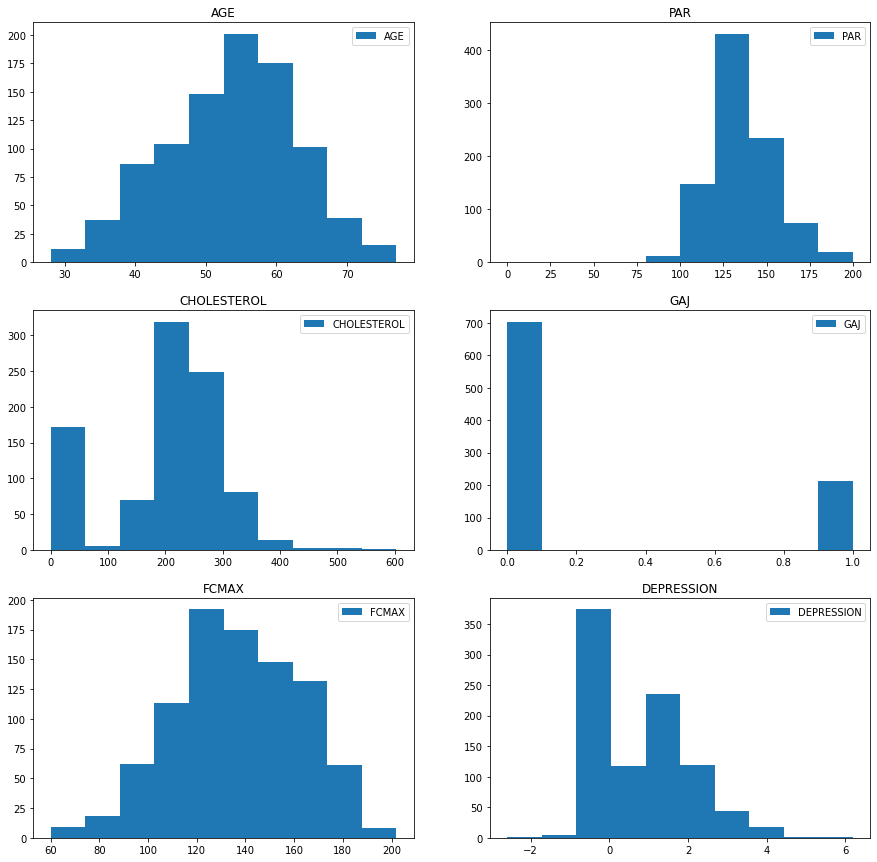

In [36]:
# Visualisation de la distribution des variables quantitatives
plt.rcParams["figure.figsize"] = 15, 15

fig, ax = plt.subplots(3, 2)

# 
ax[0, 0].hist(df.AGE, label = "AGE")
ax[0, 0].set_title("AGE", size = 12)
ax[0, 0].legend()

ax[0, 1].hist(df.PAR, label = "PAR")
ax[0, 1].set_title("PAR", size = 12)
ax[0, 1].legend()


# 
ax[1, 0].hist(df.CHOLESTEROL,label = "CHOLESTEROL")
ax[1, 0].set_title("CHOLESTEROL", size = 12)
ax[1, 0].legend()

ax[1, 1].hist(df.GAJ, label = "GAJ")
ax[1, 1].set_title("GAJ", size = 12)
ax[1, 1].legend()


# 
ax[2, 0].hist(df.FCMAX, label = "FCMAX")
ax[2, 0].set_title("FCMAX", size = 12)
ax[2, 0].legend()

ax[2, 1].hist(df.DEPRESSION, label = "DEPRESSION")
ax[2, 1].set_title("DEPRESSION", size = 12)
ax[2, 1].legend()

plt.show()

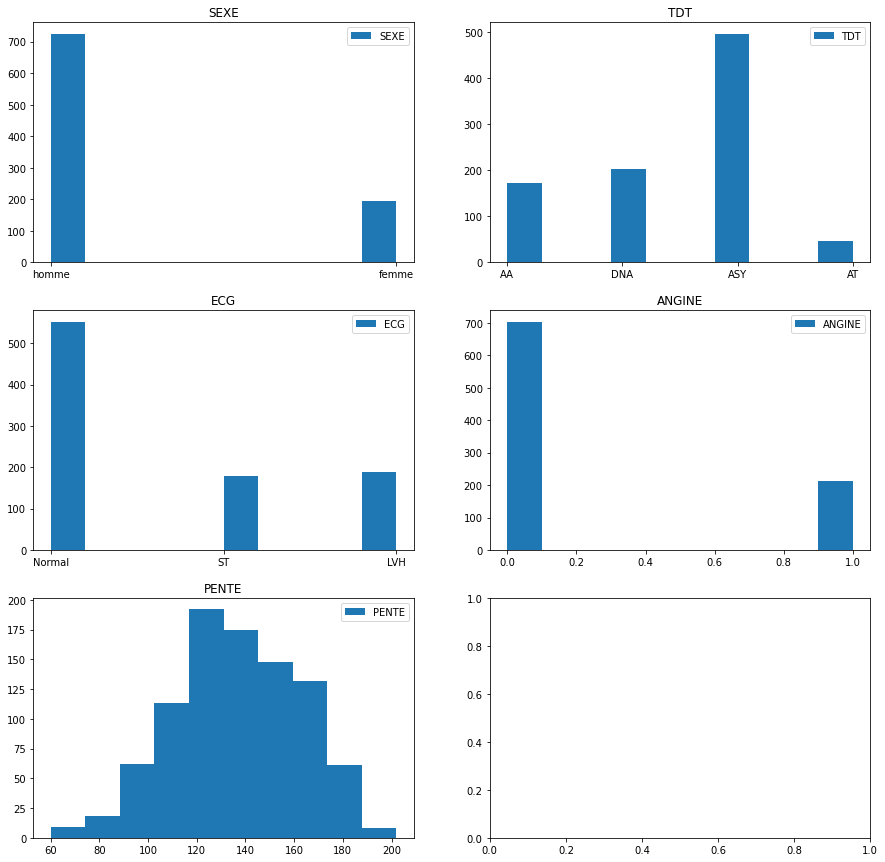

In [45]:
plt.rcParams["figure.figsize"] = 15, 15

fig, ax = plt.subplots(3, 2)

# 
ax[0, 0].hist(df.SEXE, label = "SEXE")
ax[0, 0].set_title("SEXE", size = 12)
ax[0, 0].legend()

ax[0, 1].hist(df.TDT, label = "TDT")
ax[0, 1].set_title("TDT", size = 12)
ax[0, 1].legend()


# 
ax[1, 0].hist(df.ECG,label = "ECG")
ax[1, 0].set_title("ECG", size = 12)
ax[1, 0].legend()

ax[1, 1].hist(df.GAJ, label = "ANGINE")
ax[1, 1].set_title("ANGINE", size = 12)
ax[1, 1].legend()


# 
ax[2, 0].hist(df.FCMAX, label = "PENTE")
ax[2, 0].set_title("PENTE", size = 12)
ax[2, 0].legend()

plt.show()

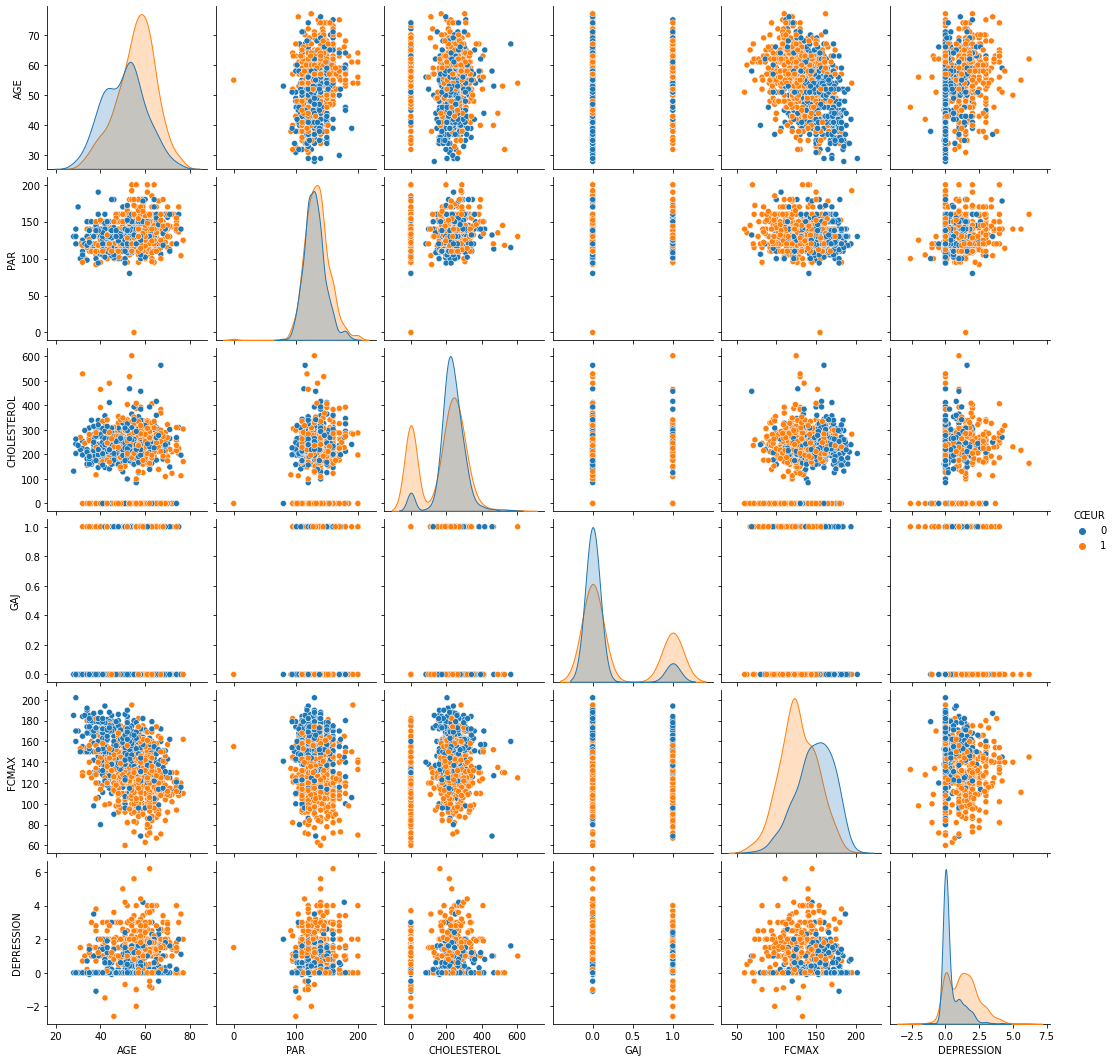

In [47]:
sns.pairplot(df[['AGE','PAR','CHOLESTEROL','GAJ','FCMAX','DEPRESSION','CŒUR']], hue='CŒUR');

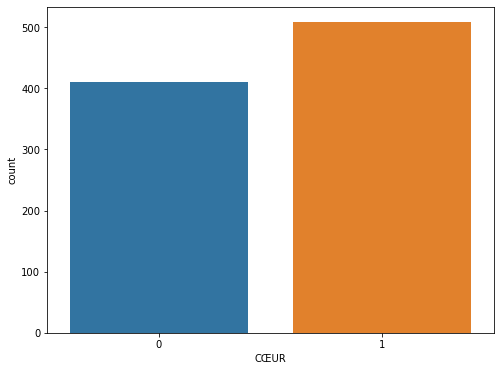

In [53]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x='CŒUR', data=df);

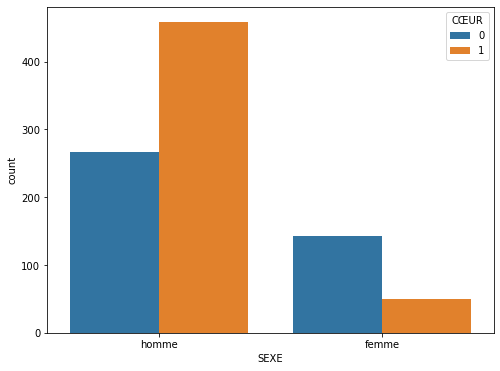

In [55]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(hue='CŒUR',x='SEXE', data=df);

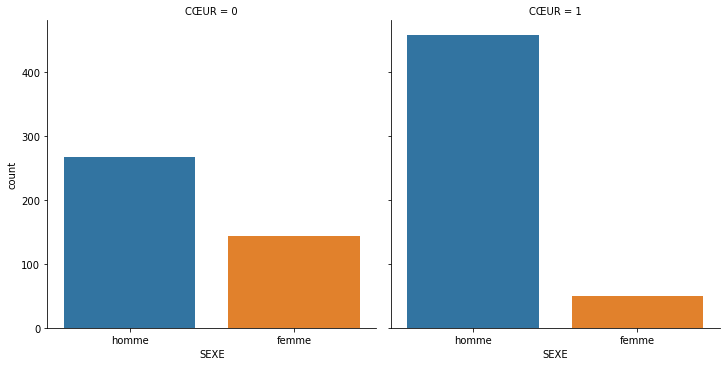

In [61]:
sns.catplot(x='SEXE', col='CŒUR', kind='count', data=df);

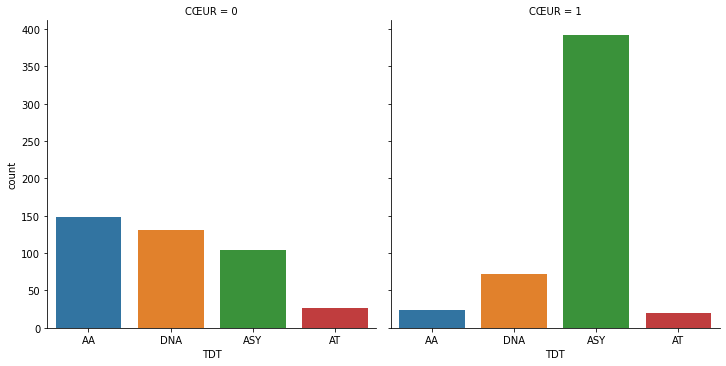

In [62]:
sns.catplot(x='TDT', col='CŒUR', kind='count', data=df);

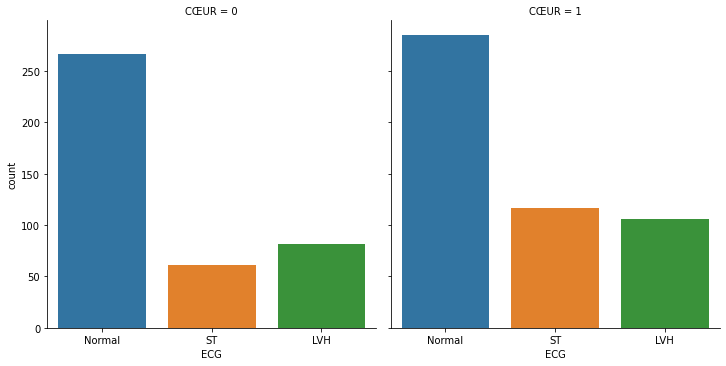

In [63]:
sns.catplot(x='ECG', col='CŒUR', kind='count', data=df);

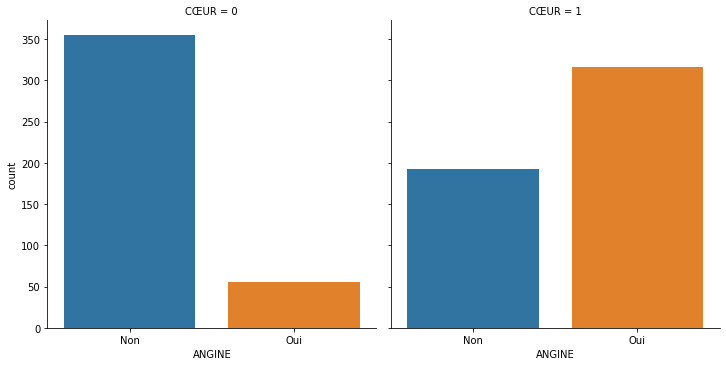

In [64]:
sns.catplot(x='ANGINE', col='CŒUR', kind='count', data=df);

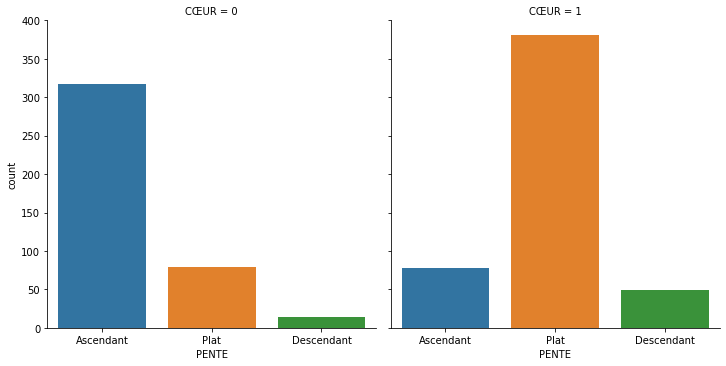

In [65]:
sns.catplot(x='PENTE', col='CŒUR', kind='count', data=df);

#### Valeurs Extremes 

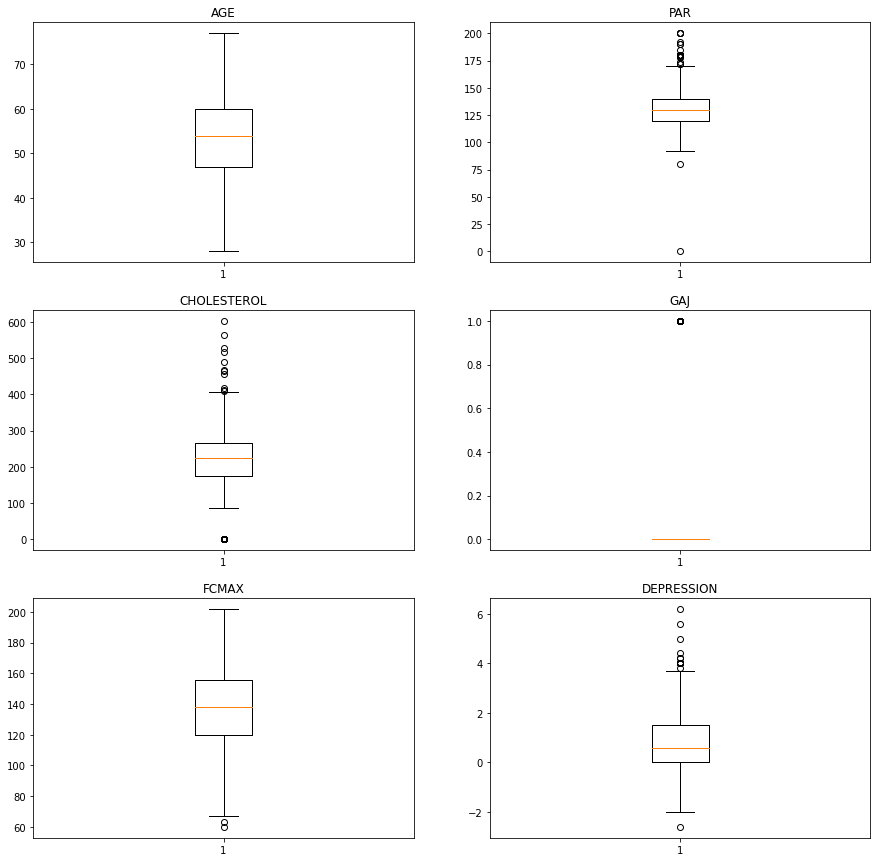

In [69]:
plt.rcParams["figure.figsize"] = 15, 15

fig, ax = plt.subplots(3, 2)

ax[0, 0].boxplot(df.AGE)
ax[0, 0].set_title("AGE", size = 12)

ax[0, 1].boxplot(df.PAR)
ax[0, 1].set_title("PAR", size = 12)

ax[1, 0].boxplot(df.CHOLESTEROL)
ax[1, 0].set_title("CHOLESTEROL", size = 12)

ax[1, 1].boxplot(df.GAJ)
ax[1, 1].set_title("GAJ", size = 12)

ax[2, 0].boxplot(df.FCMAX)
ax[2, 0].set_title("FCMAX", size = 12)

ax[2, 1].boxplot(df.DEPRESSION)
ax[2, 1].set_title("DEPRESSION", size = 12)

plt.show()

In [70]:
df['DEPRESSION'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.3      7
 2.6      7
 1.1      7
 1.9      7
 1.7      6
 2.2      5
 0.9      4
 3.6      4
 2.4      4
 3.4      3
 2.1      2
-0.1      2
 4.2      2
 3.2      2
 3.5      2
-0.5      2
 2.3      2
-1.0      2
 2.9      1
 3.8      1
-0.9      1
-2.6      1
-1.5      1
 3.7      1
 5.0      1
-2.0      1
-0.8      1
 3.1      1
 4.4      1
 5.6      1
 6.2      1
-0.7      1
-1.1      1
Name: DEPRESSION, dtype: int64

In [72]:
df['CHOLESTEROL'].value_counts()

0      172
254     11
223     10
220     10
211      9
      ... 
117      1
123      1
131      1
293      1
603      1
Name: CHOLESTEROL, Length: 222, dtype: int64

In [73]:
df['PAR'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
113      1
117      1
127      1
129      1
0        1
Name: PAR, Length: 67, dtype: int64

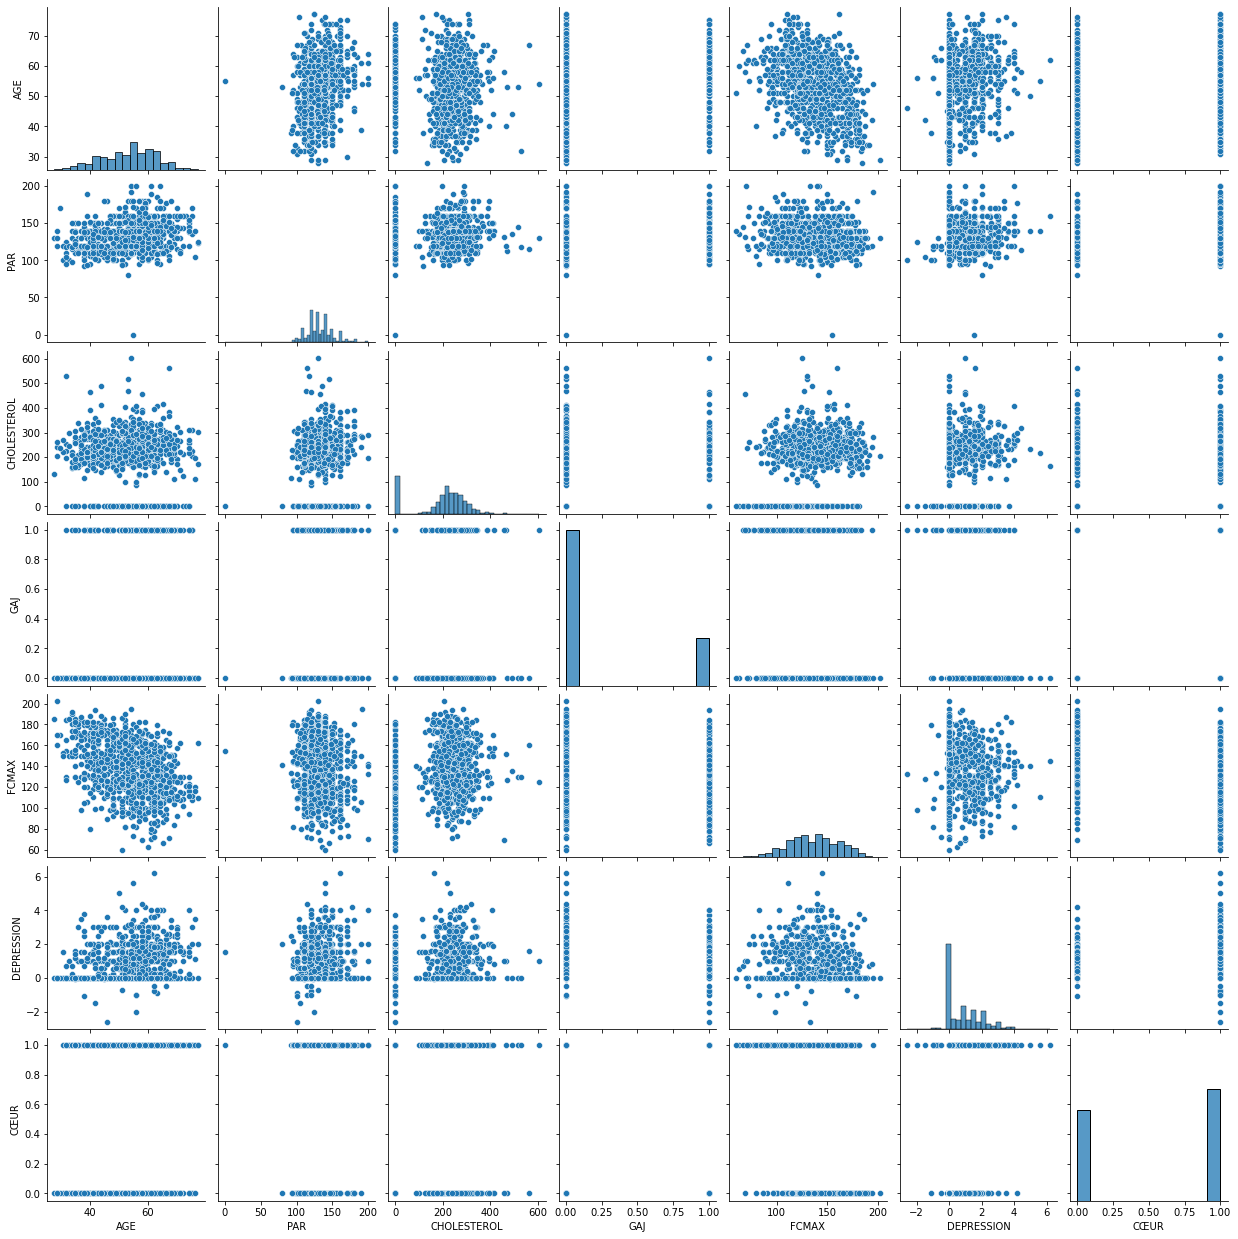

In [76]:
sns.pairplot(df)

<ipython-input-78-1fb5e92aab10>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


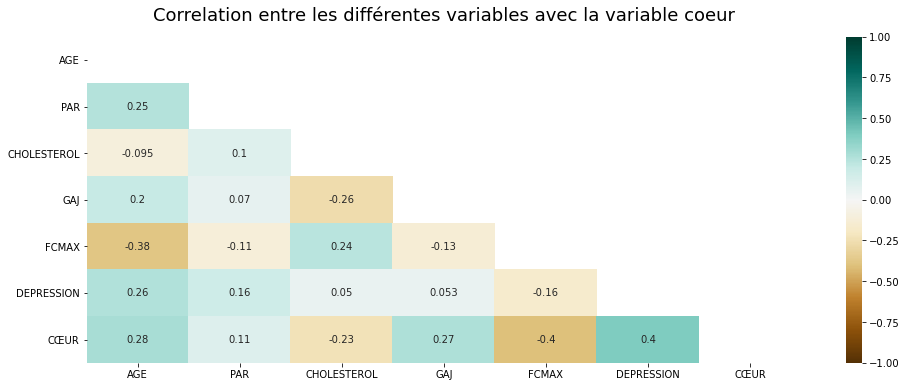

In [78]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation entre les différentes variables avec la variable coeur', fontdict={'fontsize':18}, pad=16);